In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel(r'C:\Users\SANIKA\Documents\Train_set_Flight_Price.xlsx')
test = pd.read_excel(r'C:\Users\SANIKA\Documents\Test_set_Flight_Price.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


This is new feature Booking_Class to identify the booking class i.e. Economy, Premium Economy & Business. For the 'Premium Economy' and Business class its already mentioned. Rest of the airlines I have assumed as Economy.

In [8]:
Class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}
train['Booking_Class'] = train['Airline'].map(Class)
test['Booking_Class'] = test['Airline'].map(Class)

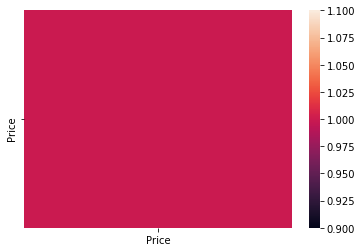

In [9]:
train_corr=train.corr()
sns.heatmap(train_corr)

In [10]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Booking_Class      0
dtype: int64

In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Booking_Class      0
dtype: int64

In [13]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Booking_Class'],
      dtype='object')

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [14]:
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_Class,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Economy,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Economy,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Economy,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Economy,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Economy,1,3


In [16]:

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_Class,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,Economy,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,Economy,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,Economy,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,Economy,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,Economy,1,3,16,50


In [19]:

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_Class,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Economy,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Economy,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Economy,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Economy,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Economy,1,3,16,50,21,35


Now,Handling Categorical data

In [21]:

# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [23]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
# Additional_Info contains almost no information
# Route and Total_Stops are related to each other

train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [27]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [29]:

# Concatenate dataframe --> train_data + Airline + Source + Destination
train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [30]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Booking_Class,Journey_day,Journey_month,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,Economy,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,Economy,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,Economy,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,Economy,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302,Economy,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [31]:
train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [32]:
# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [33]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [34]:
train.drop(["Duration"], axis = 1, inplace = True)

In [35]:
train["Booking_Class"].value_counts()

Economy            10661
Premium Economy       16
Business               6
Name: Booking_Class, dtype: int64

In [36]:
import sklearn.preprocessing as LabelEncoder

train.replace({"Economy": 0, "Premium Economy": 1, "Business": 2}, inplace = True)

In [37]:
train.shape

(10683, 31)

In [38]:
train.head()

,Total_Stops,Price,Booking_Class,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_mins
0,0.0,3897,0,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,1,2,50
1,2.0,7662,0,1,5,5,50,13,15,1,...,0,1,0,0,0,0,0,0,7,25
2,2.0,13882,0,9,6,9,25,4,25,0,...,1,0,0,1,0,0,0,0,19,0
3,1.0,6218,0,12,5,18,5,23,30,0,...,0,1,0,0,0,0,0,0,5,25
4,1.0,13302,0,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,1,4,45


Now for Test dataset

In [39]:
# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [40]:
# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [41]:
# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)


In [42]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = test[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [43]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = test[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [44]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [45]:
# Additional_Info contains almost no information
# Route and Total_Stops are related to each other

test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [47]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
test= pd.concat([test, Airline, Source, Destination], axis = 1)

In [48]:
test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [49]:
# Assigning and converting Duration column into list
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [50]:

# Adding duration_hours and duration_mins list to train_data dataframe

test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [51]:
import sklearn.preprocessing as LabelEncoder

test.replace({"Economy": 0, "Premium Economy": 1, "Business": 2}, inplace = True)

In [52]:

test.drop(["Duration"], axis = 1, inplace = True)

In [53]:
# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [54]:
test.head()

,Total_Stops,Booking_Class,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_mins
0,1,0,6,6,17,30,4,25,0,0,...,1,0,0,1,0,0,0,0,10,55
1,1,0,12,5,6,20,10,20,0,0,...,0,1,0,0,0,0,0,0,4,0
2,1,0,21,5,19,15,19,0,0,0,...,1,0,0,1,0,0,0,0,23,45
3,1,0,21,5,8,0,21,0,0,0,...,1,0,0,1,0,0,0,0,13,0
4,0,0,24,6,23,55,2,45,0,0,...,0,0,0,0,1,0,0,0,2,50


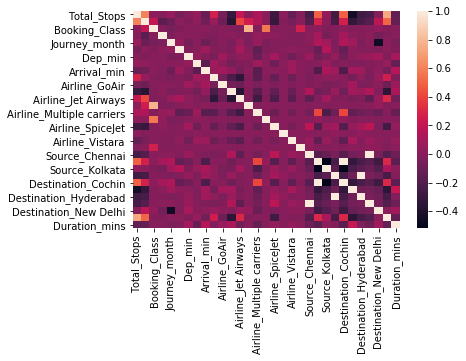

In [55]:
train_corr=train.corr()
sns.heatmap(train_corr)

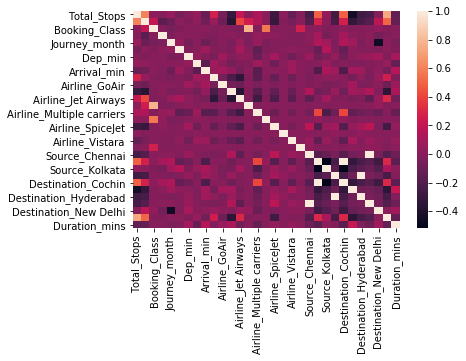

In [56]:
test_corr=test.corr()
sns.heatmap(train_corr)

In [57]:
train.isnull().sum()

Total_Stops                                  1
Price                                        0
Booking_Class                                0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [58]:
test.isnull().sum()

Total_Stops                                  0
Booking_Class                                0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai

In [59]:
train['Total_Stops'].fillna(train['Total_Stops'].mode()[0], inplace=True)

In [60]:
test['Total_Stops'].fillna(test['Total_Stops'].mode()[0], inplace=True)

In [61]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [62]:
#independent varaibles
x= train.iloc[:,train.columns!='Price'].values

In [71]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
enc = OrdinalEncoder()
x= enc.fit_transform(x)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

In [76]:
x = sc.fit_transform(x)

In [77]:
x

array([[-1.22074373, -0.04287264,  1.22719097, ...,  3.23457051,
        -0.97095961,  1.27900775],
       [ 1.74148347, -0.04287264, -1.55338776, ..., -0.30916006,
        -0.38216688, -0.19638797],
       [ 1.74148347, -0.04287264, -0.51067073, ..., -0.30916006,
         1.03093567, -1.67178369],
       ...,
       [-1.22074373, -0.04287264,  1.57476331, ..., -0.30916006,
        -0.85320107, -1.67178369],
       [-1.22074373, -0.04287264, -1.55338776, ...,  3.23457051,
        -0.97095961,  0.68884946],
       [ 1.74148347, -0.04287264, -0.51067073, ..., -0.30916006,
        -0.26440834, -0.49146712]])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state:',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to',final_r_state,'is:',max_r_score)
    return final_r_state

In [79]:
#lets use Linear Regression and check max_r2_score
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state: 42 is 0.6150199164645698
r2_score corresponding to random state: 43 is 0.6583510871973028
r2_score corresponding to random state: 44 is -8.794291489398346e+24
r2_score corresponding to random state: 45 is -2.404525981780077e+25
r2_score corresponding to random state: 46 is -9.405551647217087e+25
r2_score corresponding to random state: 47 is 0.5857595367221002
r2_score corresponding to random state: 48 is 0.6476429674612731
r2_score corresponding to random state: 49 is 0.47674167826676916
r2_score corresponding to random state: 50 is 0.5823312298569963
r2_score corresponding to random state: 51 is 0.6549691664093613
r2_score corresponding to random state: 52 is 0.5988491049200476
r2_score corresponding to random state: 53 is -2.1270235356760445e+26
r2_score corresponding to random state: 54 is 0.5961732955338357
r2_score corresponding to random state: 55 is 0.5874504997276944
r2_score corresponding to random state: 56 is 0.6197867197811322
r2_scor

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [81]:
#lets use KNN regression and check max r2 score
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state: 42 is 0.7743364717394898
r2_score corresponding to random state: 43 is 0.7723663739954837
r2_score corresponding to random state: 44 is 0.777216383062153
r2_score corresponding to random state: 45 is 0.6977575660926538
r2_score corresponding to random state: 46 is 0.7670942445813538
r2_score corresponding to random state: 47 is 0.7388073334461056
r2_score corresponding to random state: 48 is 0.745641907404603
r2_score corresponding to random state: 49 is 0.7757259958457253
r2_score corresponding to random state: 50 is 0.7286154243214733
r2_score corresponding to random state: 51 is 0.7974262013953688
r2_score corresponding to random state: 52 is 0.751408786539744
r2_score corresponding to random state: 53 is 0.7524516601839929
r2_score corresponding to random state: 54 is 0.758946590378287
r2_score corresponding to random state: 55 is 0.7090240622086397
r2_score corresponding to random state: 56 is 0.7528497470443527
r2_score corresponding to ran

In [82]:
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNeighborsRegressor: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for Linear Regression: -4.592564805043317e+25
standard deviation in r2 score for Linear Regression:  9.185129610086634e+25

Mean r2 score for KNN Regression: 0.7570045803713339
standard deviation in r2 score for KNeighborsRegressor:  0.005302342648584768



In [83]:
#lets check lasso regression & find alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [84]:
#lets check max_r2_score with alpha=1
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state: 42 is 0.615084252925498
r2_score corresponding to random state: 43 is 0.6576146447983169
r2_score corresponding to random state: 44 is 0.6187976000275288
r2_score corresponding to random state: 45 is 0.573503968826051
r2_score corresponding to random state: 46 is 0.620467086856129
r2_score corresponding to random state: 47 is 0.5856046397066155
r2_score corresponding to random state: 48 is 0.6480324502061665
r2_score corresponding to random state: 49 is 0.6173043321799347
r2_score corresponding to random state: 50 is 0.58250520294133
r2_score corresponding to random state: 51 is 0.6554494721298172
r2_score corresponding to random state: 52 is 0.5989388647964025
r2_score corresponding to random state: 53 is 0.617842794190457
r2_score corresponding to random state: 54 is 0.5962076935682539
r2_score corresponding to random state: 55 is 0.5876635343292463
r2_score corresponding to random state: 56 is 0.6188973342535677
r2_score corresponding to rando

In [85]:
print('Mean r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for Lasso Regression: 0.6200027867614195
standard deviation in r2 score for Lasso Regression:  0.01944869897469238



In [86]:
#Now we will try to boost 
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [87]:
gbr=GradientBoostingRegressor(learning_rate=0.1 ,n_estimators=1000 )
print('Mean r2 score for GradientBoostingRegressor:',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for GradientBoostingRegressor: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for GradientBoostingRegressor: 0.8283766606668859
standard deviation in r2 score for GradientBoostingRegressor:  0.01004198444514343



In [ ]:
#We tried all the models and till now the best is GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =49 ,test_size = 0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred=gbr.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score is:',r2_score(y_test, y_pred))